In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data\hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.shape

(5000, 3)

In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [10]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

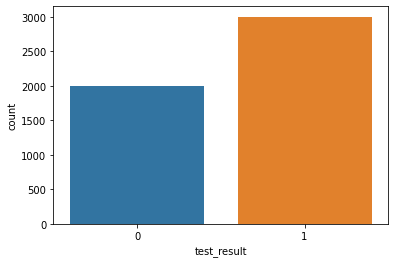

In [12]:
sns.countplot(data=df,x="test_result")

In [13]:
plt.figure(dpi=100)

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='test_result', ylabel='age'>

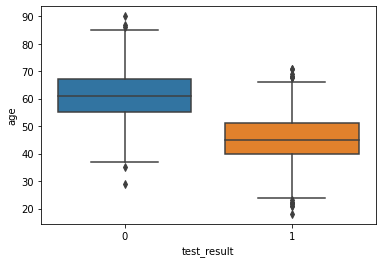

In [14]:
#box plot
sns.boxplot(data=df,x="test_result",y="age")

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

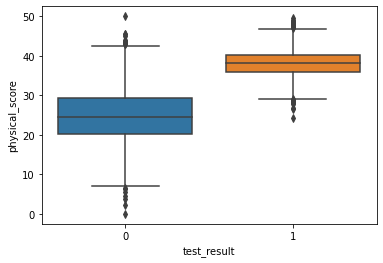

In [16]:
sns.boxplot(data=df,x="test_result",y="physical_score")

<AxesSubplot:xlabel='age', ylabel='physical_score'>

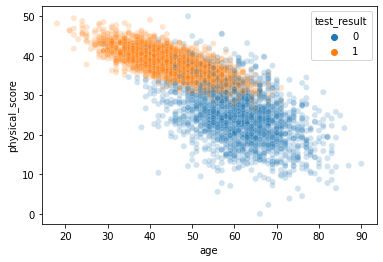

In [20]:
sns.scatterplot(data=df,x="age",y="physical_score",hue="test_result",alpha=0.2)

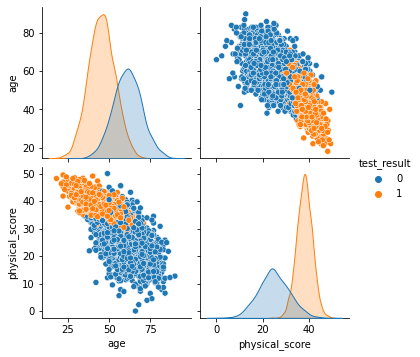

In [21]:
sns.pairplot(data=df,hue="test_result")

<AxesSubplot:>

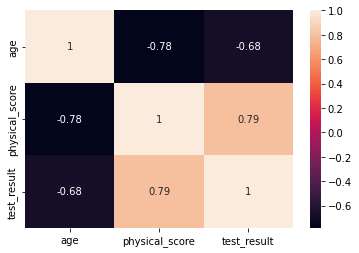

In [22]:
#correlation 
sns.heatmap(df.corr(),annot=True)

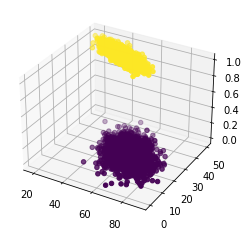

In [23]:
#3d scatterplot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df["age"], df["physical_score"], df["test_result"],c=df["test_result"])

In [24]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [25]:
#seprating the features 
x=df.drop("test_result",axis=1)

In [28]:
y=df['test_result']

In [29]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)

In [30]:
#import model
from sklearn.linear_model import LogisticRegression

In [31]:
log_model=LogisticRegression()

In [32]:
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [35]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [36]:
#Q cofficient i.e log odds 

In [38]:
y_pred=log_model.predict(scaled_x_test)

In [39]:
y_pred[0]

1

In [40]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [41]:
y_prob=log_model.predict_proba(scaled_x_test)

In [42]:
y_prob

array([[3.09267151e-02, 9.69073285e-01],
       [3.46183276e-02, 9.65381672e-01],
       [9.89850652e-01, 1.01493479e-02],
       [2.63867805e-03, 9.97361322e-01],
       [9.76798467e-01, 2.32015329e-02],
       [9.90296858e-01, 9.70314158e-03],
       [9.17503241e-02, 9.08249676e-01],
       [2.23885958e-02, 9.77611404e-01],
       [9.97136737e-01, 2.86326280e-03],
       [4.21538922e-02, 9.57846108e-01],
       [1.02178637e-01, 8.97821363e-01],
       [1.32310276e-02, 9.86768972e-01],
       [9.53021603e-03, 9.90469784e-01],
       [9.41001469e-01, 5.89985310e-02],
       [1.73909902e-04, 9.99826090e-01],
       [8.23877636e-02, 9.17612236e-01],
       [9.89664721e-01, 1.03352792e-02],
       [3.85833550e-03, 9.96141665e-01],
       [7.99114453e-04, 9.99200886e-01],
       [9.96617310e-01, 3.38268988e-03],
       [8.93305492e-01, 1.06694508e-01],
       [1.57519985e-01, 8.42480015e-01],
       [5.84191779e-01, 4.15808221e-01],
       [4.37511514e-02, 9.56248849e-01],
       [4.394643

classification matrics

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
confusion_matrix(y_test,y_pred)

array([[173,  20],
       [ 18, 289]], dtype=int64)

In [45]:
from sklearn.metrics import plot_confusion_matrix

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


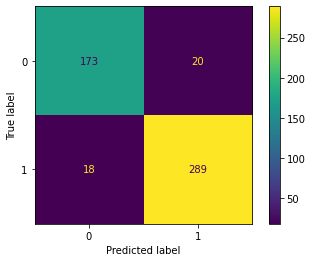

In [47]:
plot_confusion_matrix(log_model,scaled_x_test,y_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [50]:
from sklearn.metrics import precision_score,recall_score

In [51]:
precision_score(y_test,y_pred)

0.9352750809061489

In [52]:
recall_score(y_test,y_pred)

0.9413680781758957

ROC curve

In [53]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


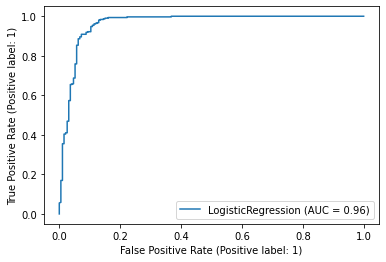

In [55]:
plot_roc_curve(log_model,scaled_x_test,y_test)

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


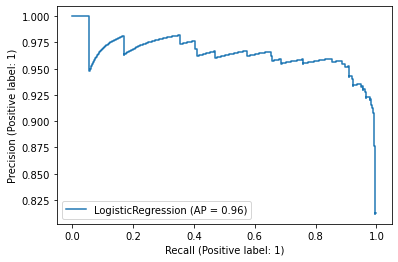

In [56]:
plot_precision_recall_curve(log_model,scaled_x_test,y_test)